In [11]:
import graphviz as gv
import heapq
import math

In [13]:
class CodingTree:
    sNodeCount = 0
    
    def __init__(self):
        CodingTree.sNodeCount += 1
        self.mID = CodingTree.sNodeCount
        
    def count(self):
        "compute the number of characters"
        pass
        
    def cost(self):
        "compute the number of bits used by this coding tree"
        pass
        
    def getID(self):
        return self.mID  # used only by graphviz

In [14]:
def _make_string(self, Attributes):
        # map the function __str__ to all attributes and join them with a comma
        name = self.__class__.__name__
        return f"{name}({', '.join(map(str, [getattr(self, at) for at in Attributes]))})"
    
CodingTree._make_string = _make_string

In [15]:
def toDot(self):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}
    self._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if isinstance(t, Leaf):
            if t.mCharacter == ' ':
                dot.node(str(n), label='{ \' \' |' + "{:,}".format(t.mFrequency) + '}') 
            elif t.mCharacter == '\t':
                dot.node(str(n), label='{ \'\\\\t\' |' + "{:,}".format(t.mFrequency) + '}') 
            elif t.mCharacter == '\n':
                dot.node(str(n), label='{ \'\\\\n\' |' + "{:,}".format(t.mFrequency) + '}')     
            elif t.mCharacter == '\v':
                dot.node(str(n), label='{ \'\\\\v\' |' + "{:,}".format(t.mFrequency) + '}')     
            else:
                dot.node(str(n), label='{' + str(t.mCharacter) + '|' + "{:,}".format(t.mFrequency) + '}') 
        elif isinstance(t, Node):
            dot.node(str(n), label="{:,}".format(t.count()))
        else:
            assert False, f'Unknown node {t}'
    for n, t in nodeDict.items():
        if isinstance(t, Node):
            dot.edge(str(n), str(t.mLeft .getID()), label='0')
            dot.edge(str(n), str(t.mRight.getID()), label='1')
    return dot

CodingTree.toDot = toDot

In [16]:
def _collectIDs(self, nodeDict):
    nodeDict[self.getID()] = self
    if isinstance(self, Node):
        self.mLeft ._collectIDs(nodeDict)
        self.mRight._collectIDs(nodeDict)
        
CodingTree._collectIDs = _collectIDs

In [17]:
class Leaf(CodingTree):
    def __init__(self, c, f):
        CodingTree.__init__(self)
        self.mCharacter = c
        self.mFrequency = f
        
    def count(self):
        return self.mFrequency
    
    def cost(self):
        return 0
    
    def __str__(self):
        return _make_string(self, ['mCharacter', 'mFrequency'])
    
    def __lt__(self, other):
        if isinstance(other, Node):
            return True
        return self.mCharacter < other.mCharacter

In [18]:
class Node(CodingTree):
    def __init__(self, l, r):
        CodingTree.__init__(self)
        self.mLeft  = l
        self.mRight = r

    def count(self):
        return self.mLeft.count() + self.mRight.count()
        
    def cost(self):
        return self.mLeft.cost() + self.mRight.cost() + self.count()
    
    def __str__(self):
        return _make_string(self, ['mLeft', 'mRight'])
    
    def __lt__(self, other):
        if isinstance(other, Leaf):
            return False
        return self.mLeft < other.mLeft

In [19]:
def coding_tree(M):
    H = []  # empty priority queue
    for c, f in M:
        heapq.heappush(H, (f, Leaf(c, f)))
    while len(H) > 1:
        a = heapq.heappop(H)
        b = heapq.heappop(H)
        heapq.heappush(H, (a[0] + b[0], Node(a[1], b[1])))
    return H[0][1]

In [20]:
def log2(n):
    return math.log(n) / math.log(2)

In [21]:
def demo(M):
    K = coding_tree(M)
    n = math.ceil(log2(len(M)))
    cost_huffman  = K.cost()
    cost_constant = n * K.count()
    savings       = (cost_constant - cost_huffman) / cost_constant
    print(f'cost of encoding with Huffman coding tree : {"{:,}".format(cost_huffman)} bits')
    print(f'cost of encoding with {n} bits              : {"{:,}".format(cost_constant)} bits')
    print(f'savings: {100 * savings}%')
    return K

In [22]:
def demo_file(fn):
    with open(fn, 'r') as file:
        s = file.read() # read file as string s
    Frequencies = {}
    for c in s:
        f = Frequencies.get(c, 0)
        if f != 0:
            Frequencies[c] += 1
        else:
            Frequencies[c] = 1
    M = { (c, f) for (c, f) in Frequencies.items() }
    print(M)
    return demo(M)

## The Functions `encode` and `decode`

In this section, our aim is to implement two functions.
* $\texttt{encode}: \mathcal{K} \times \Sigma^* \rightarrow \{0,1\}^*$

  Given a coding tree $k$ and a string $s$, the function $\texttt{encode}(k, s)$ encodes the string $s$ into a binary string.
* $\texttt{decode}: \mathcal{K} \times \{0,1\}^* \rightarrow \Sigma^*$

  Given a coding tree $k$ and a binary string $b$, the function $\texttt{decode}(k, b)$ decodes the string $b$ into a string $s \in \Sigma^*$.

### Idea for encode

1. Create a dictionary mapping each character in $k$ to its binary representation
2. Loop through string and exchange each character with the binary representation stored in said dictionary

#### Auxiliary method chars

$\texttt{chars}$ is meant to return a dictionary mapping each character in $k$ to its binary representation. It is defined as follows:

$$ \texttt{chars}: \mathcal{K} \rightarrow \texttt{Dictionary}(\Sigma, \{0, 1\}^*) $$

- $\texttt{Leaf}(c, f).chars() = Dictionary(c, \epsilon)$
- $\texttt{Node}(l, r).chars() = l.chars() + r.chars() $


In [56]:
def chars(self):
	return {self.mCharacter: ''}

Leaf.chars = chars;
del chars

In [57]:
def chars(self):
	lc = self.mLeft.chars()
	rc = self.mRight.chars()
	for c in lc:
		lc[c] = '0' + lc[c]
	for c in rc:
		rc[c] = '1' + rc[c]
	return {**lc, **rc}

Node.chars = chars
del chars

- $\texttt{Node}(l,r)\texttt{.encode}(c, r) = \texttt{Node}(l, r)\texttt{.chars}()[c] + \texttt{Node}(l, r)\texttt{.encode}(r)$

In [58]:
def encode(self, s):
	chars = self.chars()
	b = ''
	for c in s:
		b += chars[c]
	return b

Node.encode = encode
del encode

### Definition for k.decode(w)

- $\texttt{Node}(l, r).\texttt{decode}(0 + w) = l.\texttt{decode}(w)$
- $\texttt{Node}(l, r).\texttt{decode}(1 + w) = r.\texttt{decode}(w)$
- $\texttt{Leaf}(c, f).\texttt{decode}(w) = c + k.\texttt{decode}(w)$

In [45]:
def decode(self, b):
	s = ''
	t = self
	for i in range(len(b)):
		if b[i] == '0':
			t = t.mLeft
		elif b[i] == '1':
			t = t.mRight
		
		if isinstance(t, Leaf):
			s += t.mCharacter
			t = self
	return s

Node.decode = decode
del decode

## Testing

cost of encoding with Huffman coding tree : 1,012 bits
cost of encoding with 2 bits              : 2,000 bits
savings: 49.4%


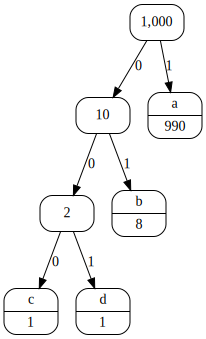

In [46]:
K = demo({ ('a', 990), ('b', 8), ('c', 1), ('d', 1) })
K.toDot()

In [59]:
K.chars()

{'c': '000', 'd': '001', 'b': '01', 'a': '1'}

In [60]:
K.encode('bad')

'011001'

In [61]:
K.decode('011001')

'bad'

In [63]:
def test(k, s):
	assert k.decode(k.encode(s)) == s, f's={s}, k.encode={k.encode(s)}, k.deocde={k.decode(k.encode(s))}'

In [66]:
test(K, 'baaaaadddccaaaabbbabbbcccdd')